# Instrucciones:

Utilizarán el dataset de tweets sobre desastres naturales
Estos tweets corresponden a 2 categorías. Los tweets marcados con un 1, corresponden a desastres reales, los marcados con 0 corresponden a desastres no reales

1. Mapear los 1 a "real disaster", y los 0 a "not-real disaster"

2. Crear nubes de palabras de unigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales

3. Crear graficos de barras que muestren los 15 unigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

4. Crear nubes de palabras de unigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales

5. Crear graficos de barras que muestren los 15 unigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

6. Crear nubes de palabras de bigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales

7. Crear graficos de barras que muestren los 15 bigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

8. Crear nubes de palabras de trigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales

9. Crear graficos de barras que muestren los 15 trigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

10. Crear una funcion de vectorizacion para los tweets del dataset. La funcion debera convertir a minusculas, eliminar hashtags, taggeos del tipo "@usuario" e hipervinculos. Eliminar stopwords, lematizar y obtener la representacion vectorial del texto con base en los vectores de GloVe (glove.6B.300d.txt). Aplicar dicha funcion sobre la columna que contiene el texto de los tweets. Guardar ese resultado en una columna nueva llamada "vector"

11. Crear un modelo de TSNE que permita visualizar los vectores obtenidos en 2 dimensiones. El color estará dictado por la categoría del tweet (desastre real o no) y el hover data deberá ser el texto del tweet original

12. Crear un pipeline de clasificacion para predecir el contenido de la columna "target". Pueden usar la cantidad de modelos e hiperparametros que quieran (nota: minimo dos modelos con dos combianaciones distitnas de parametros cada uno)

13. Crear un motor de busqueda sobre el dataset utilizando similitud coseno (es decir, se debera vectorizar la pregunta  a buscar y computar su similitud contra todos los vectores del dataset. Al final, mostrar los resultados mas similares)
Se sugiere implementar un parametro "x" para controlar el numero de records devueltos. Ejemplo: setear X a 10 implicaria regresar los 10 textos mas parecidos


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/LIDCI/5/PROCESAMIENTO DE LENGUAJE NATURAL/tweet_disaster.csv')
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


#1. Mapear los 1 a "real disaster", y los 0 a "not-real disaster"

In [4]:
tweets=''.join(df['text'])
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
!pip install contractions

In [6]:
import contractions
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')
stop_words_en = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [7]:
from tqdm import tqdm
import contractions
tqdm.pandas()

def preprocesamiento_texto(texto):
  texto = contractions.fix(texto)
  texto = texto.lower()
  texto = re.sub(r'[^a-zA-Z\s]','', texto)
  texto = word_tokenize(texto)
  texto = [token for token in texto if token not in stop_words_en]
  texto = [lemmatizer.lemmatize(word) for word in texto]
  texto = ' '.join(texto)
  return texto

In [8]:
df['clean_tweet']=df['text'].progress_apply(preprocesamiento_texto)
df.head()

100%|██████████| 7613/7613 [00:12<00:00, 588.79it/s] 


,id,keyword,location,text,target,clean_tweet
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


In [9]:
mapper = {
    1: 'real disaster',
    0: 'not-real disaster'
}

df['label'] = df['target'].map(mapper)
df.head()

,id,keyword,location,text,target,clean_tweet,label
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,real disaster
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,real disaster
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,real disaster
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,real disaster
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,real disaster


#2. Crear nubes de palabras de unigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales

In [15]:
def generate_wordcloud(freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()


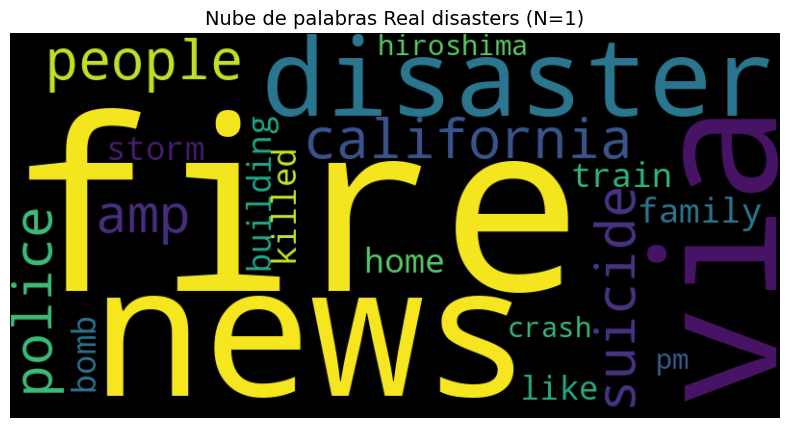

In [23]:
for n, freqs in ngrams_real.items():
    generate_wordcloud(freqs, f'Nube de palabras Real disasters (N={n})')

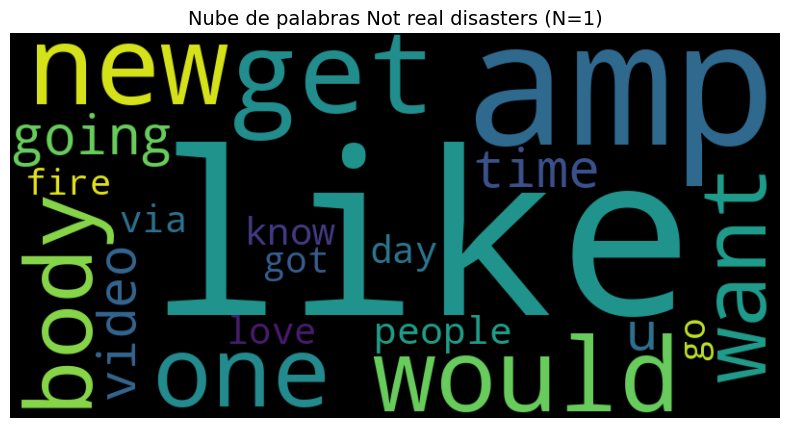

In [22]:
for n, freqs in ngrams_notreal.items():
    generate_wordcloud(freqs, f'Nube de palabras Not real disasters (N={n})')

#3. Crear graficos de barras que muestren los 15 unigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.util import ngrams
from collections import Counter


In [13]:
def get_ngrams(texts, n=1, top_k=20):
    all_ngrams = []
    for text in texts:
        tokens = word_tokenize(text)
        n_grams = list(ngrams(tokens, n))
        all_ngrams.extend([' '.join(gram) for gram in n_grams])

    freq_dist = Counter(all_ngrams)
    return dict(freq_dist.most_common(top_k))

In [17]:
real_disasters = df[df['target'] == 1]['clean_tweet']
not_real_disasters = df[df['target'] == 0]['clean_tweet']

In [20]:
ngrams_real = {n: get_ngrams(real_disasters, n) for n in [1]}
ngrams_notreal = {n: get_ngrams(not_real_disasters, n) for n in [1]}

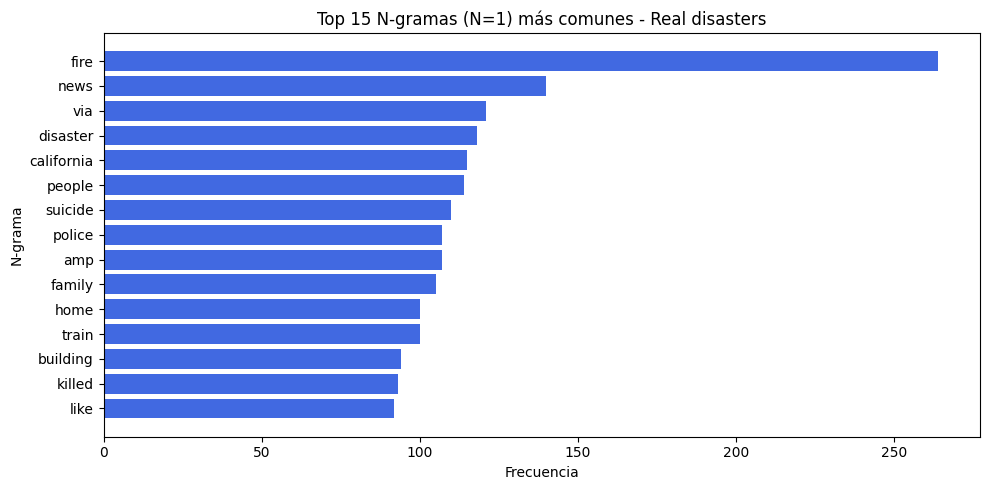

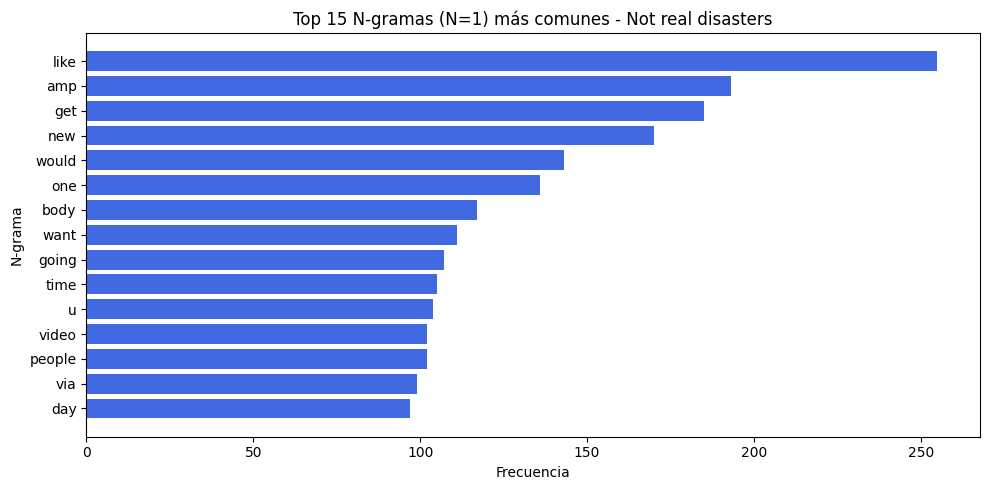

In [21]:
def plot_ngrams_bar(freq_dict, n, label):
    data = pd.Series(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.barh(data.index, data.values, color='royalblue')
    plt.xlabel('Frecuencia')
    plt.ylabel('N-grama')
    plt.title(f"Top 15 N-gramas (N={n}) más comunes - {label}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

for n, freqs in ngrams_real.items():
    plot_ngrams_bar(dict(list(freqs.items())[:15]), n, 'Real disasters')

for n, freqs in ngrams_notreal.items():
    plot_ngrams_bar(dict(list(freqs.items())[:15]), n, 'Not real disasters')

#4. Crear nubes de palabras de unigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales

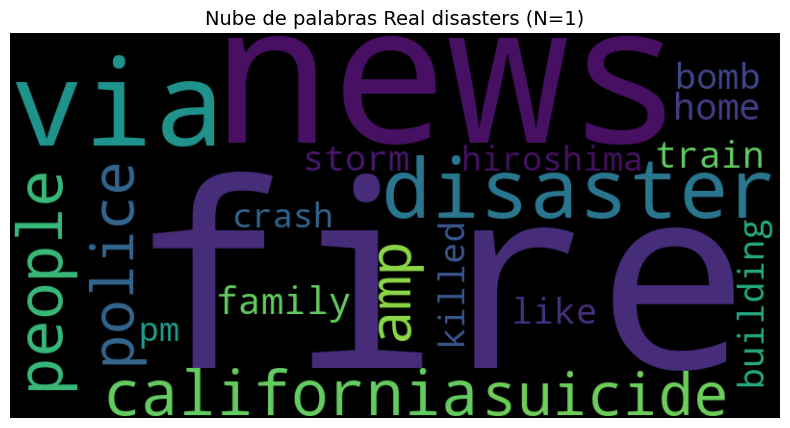

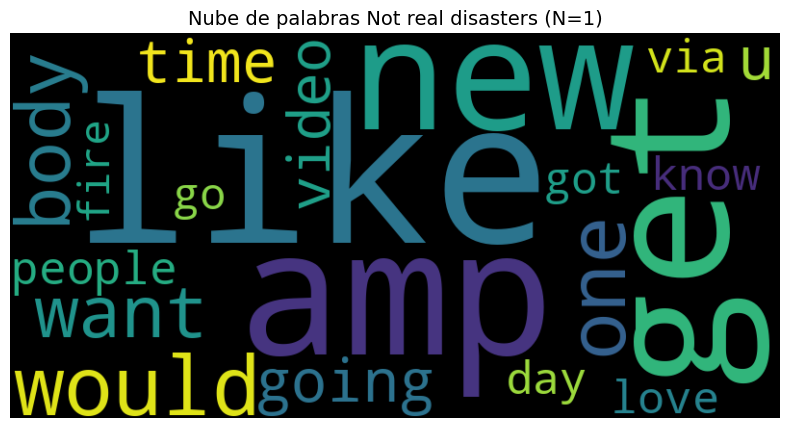

In [24]:
def generate_wordcloud(freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

for n, freqs in ngrams_real.items():
    generate_wordcloud(freqs, f'Nube de palabras Real disasters (N={n})')
for n, freqs in ngrams_notreal.items():
    generate_wordcloud(freqs, f'Nube de palabras Not real disasters (N={n})')

#5. Crear graficos de barras que muestren los 15 unigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

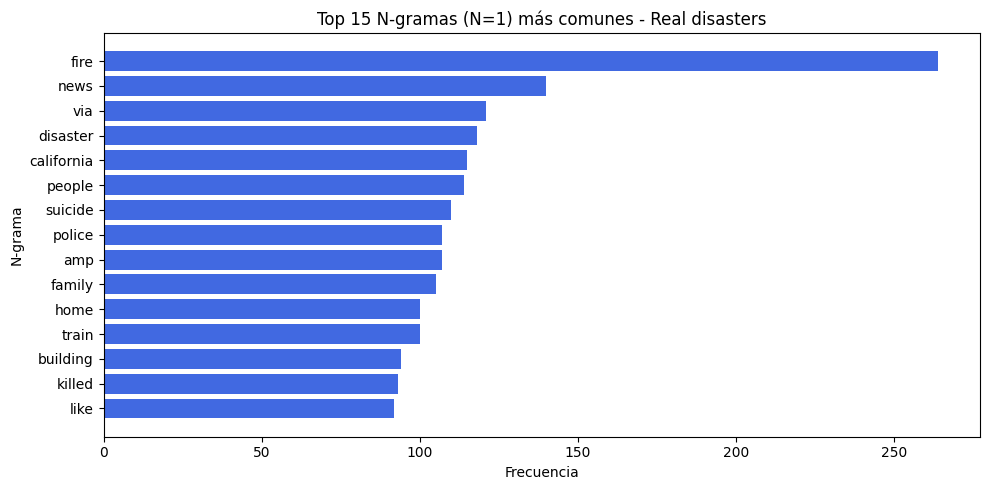

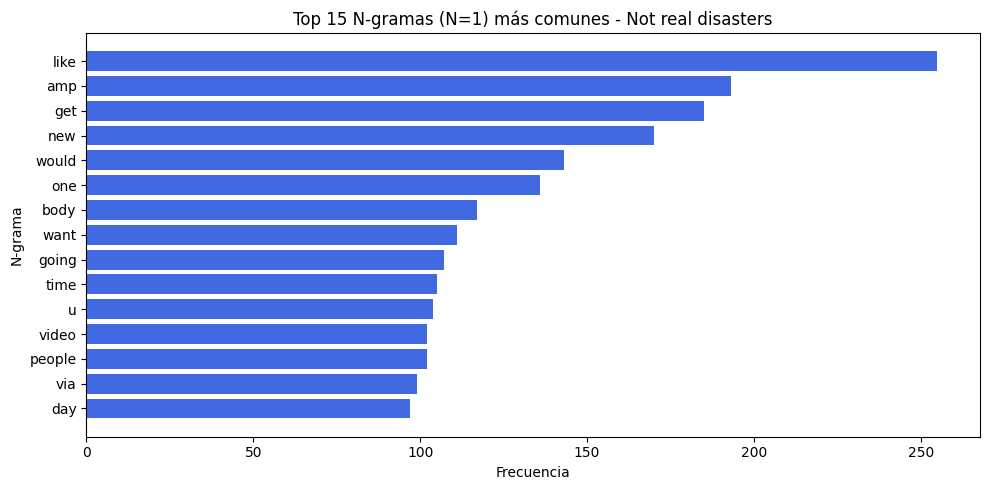

In [25]:
def get_ngrams(texts, n=1, top_k=20):
    all_ngrams = []
    for text in texts:
        tokens = word_tokenize(text)
        n_grams = list(ngrams(tokens, n))
        all_ngrams.extend([' '.join(gram) for gram in n_grams])

    freq_dist = Counter(all_ngrams)
    return dict(freq_dist.most_common(top_k))

real_disasters = df[df['target'] == 1]['clean_tweet']
not_real_disasters = df[df['target'] == 0]['clean_tweet']

ngrams_real = {n: get_ngrams(real_disasters, n) for n in [1]}
ngrams_notreal = {n: get_ngrams(not_real_disasters, n) for n in [1]}

def plot_ngrams_bar(freq_dict, n, label):
    data = pd.Series(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.barh(data.index, data.values, color='royalblue')
    plt.xlabel('Frecuencia')
    plt.ylabel('N-grama')
    plt.title(f"Top 15 N-gramas (N={n}) más comunes - {label}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

for n, freqs in ngrams_real.items():
    plot_ngrams_bar(dict(list(freqs.items())[:15]), n, 'Real disasters')

for n, freqs in ngrams_notreal.items():
    plot_ngrams_bar(dict(list(freqs.items())[:15]), n, 'Not real disasters')

#6, 7, 8, 9.Crear nubes de palabras de bigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales. Crear graficos de barras que muestren los 15 bigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales. Crear nubes de palabras de trigramas. Una para los tweets sobre desastres verdaderos, y una para los tweets sobre desastres no reales. Crear graficos de barras que muestren los 15 trigramas mas comunes. Uno para los tweets sobre desastres verdaderos, y uno para los tweets sobre desastres no reales

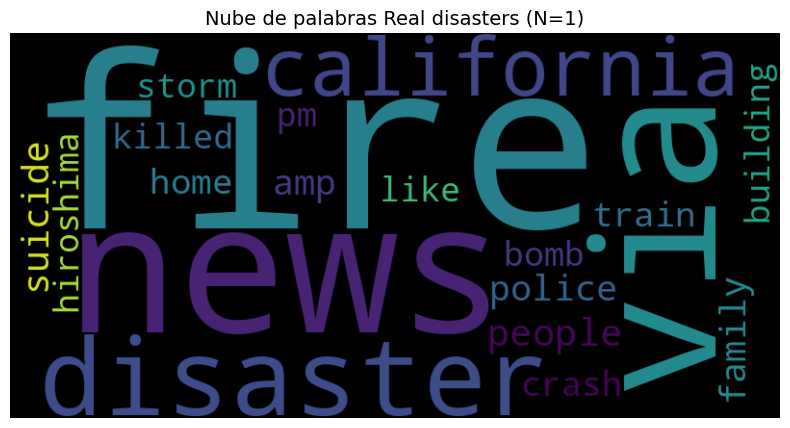

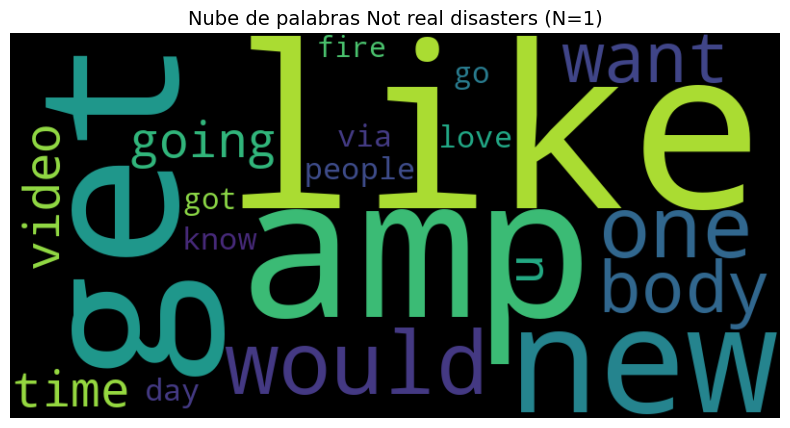

In [26]:
def generate_wordcloud(freq_dict, title):
    wordcloud = WordCloud(width=800, height=400, background_color='black').generate_from_frequencies(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title, fontsize=14)
    plt.show()

for n, freqs in ngrams_real.items():
    generate_wordcloud(freqs, f'Nube de palabras Real disasters (N={n})')
for n, freqs in ngrams_notreal.items():
    generate_wordcloud(freqs, f'Nube de palabras Not real disasters (N={n})')

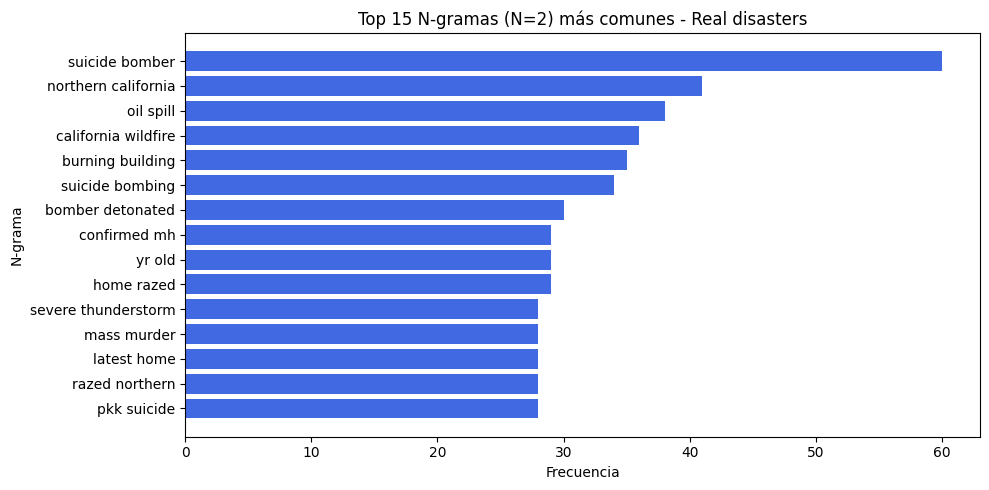

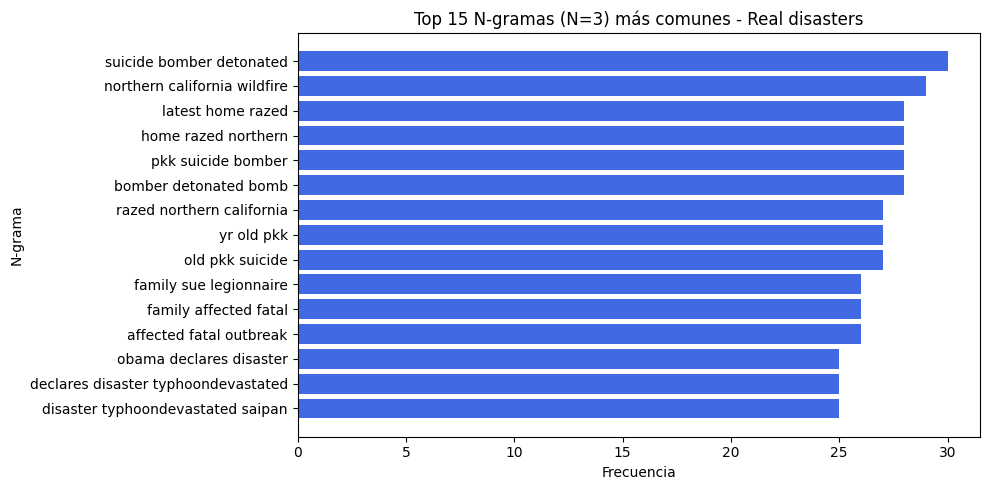

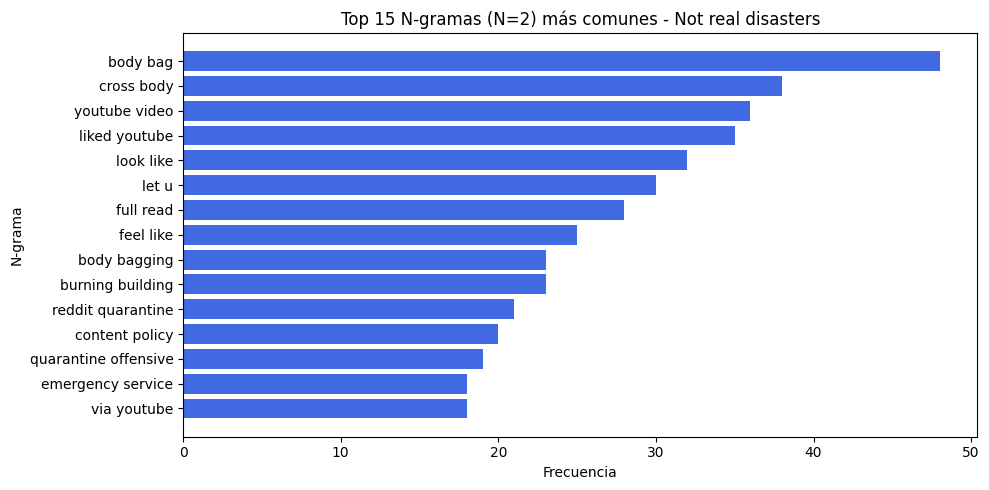

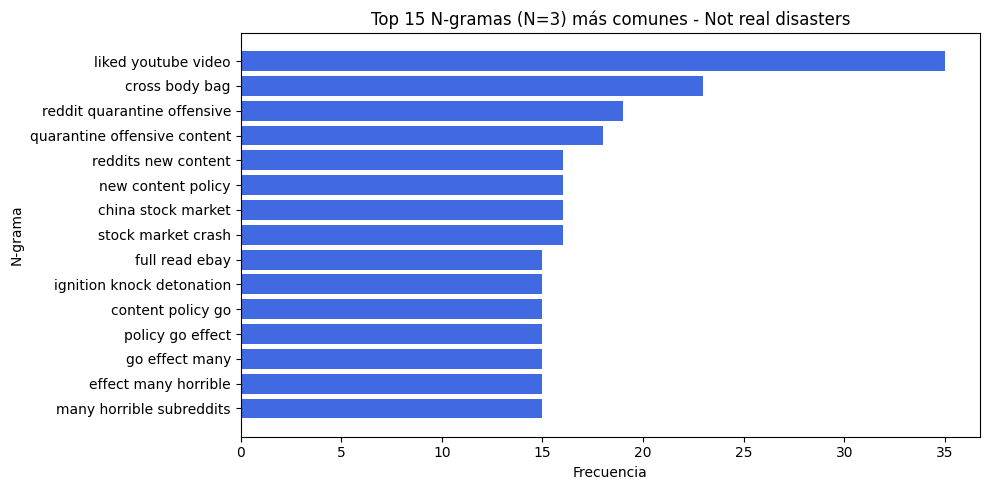

In [27]:
def get_ngrams(texts, n=1, top_k=20):
    all_ngrams = []
    for text in texts:
        tokens = word_tokenize(text)
        n_grams = list(ngrams(tokens, n))
        all_ngrams.extend([' '.join(gram) for gram in n_grams])

    freq_dist = Counter(all_ngrams)
    return dict(freq_dist.most_common(top_k))

real_disasters = df[df['target'] == 1]['clean_tweet']
not_real_disasters = df[df['target'] == 0]['clean_tweet']

ngrams_real = {n: get_ngrams(real_disasters, n) for n in [2,3]}
ngrams_notreal = {n: get_ngrams(not_real_disasters, n) for n in [2,3]}

def plot_ngrams_bar(freq_dict, n, label):
    data = pd.Series(freq_dict)
    plt.figure(figsize=(10, 5))
    plt.barh(data.index, data.values, color='royalblue')
    plt.xlabel('Frecuencia')
    plt.ylabel('N-grama')
    plt.title(f"Top 15 N-gramas (N={n}) más comunes - {label}")
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

for n, freqs in ngrams_real.items():
    plot_ngrams_bar(dict(list(freqs.items())[:15]), n, 'Real disasters')

for n, freqs in ngrams_notreal.items():
    plot_ngrams_bar(dict(list(freqs.items())[:15]), n, 'Not real disasters')

#10. Crear una funcion de vectorizacion para los tweets del dataset. La funcion debera convertir a minusculas, eliminar hashtags, taggeos del tipo "@usuario" e hipervinculos. Eliminar stopwords, lematizar y obtener la representacion vectorial del texto con base en los vectores de GloVe (glove.6B.300d.txt). Aplicar dicha funcion sobre la columna que contiene el texto de los tweets. Guardar ese resultado en una columna nueva llamada "vector"

In [30]:

def vectorizar_tweet(tweet, embeddings):

  tweet = tweet.lower()
  tweet = re.sub(r'#\w+', '', tweet)
  tweet = re.sub(r'@\w+', '', tweet)
  tweet = re.sub(r'http\S+', '', tweet)
  tokens = word_tokenize(tweet)
  tokens = [token for token in tokens if token not in stop_words_en]
  tokens = [lemmatizer.lemmatize(word) for word in tokens]

  vector_tweet = []
  for token in tokens:
    if token in embeddings:
      vector_tweet.append(embeddings[token].astype(np.float64))

  if not vector_tweet:
    return None

  return np.mean(vector_tweet, axis=0)


import numpy as np
embeddings = {}
with open('/content/drive/MyDrive/LIDCI/5/PROCESAMIENTO DE LENGUAJE NATURAL/glove.6B/glove.6B.300d.txt', encoding='utf-8') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vectors = np.asarray(values[1:], dtype = np.float64)
    embeddings[word]=vectors

df['vector'] = df['clean_tweet'].progress_apply(vectorizar_tweet, args=(embeddings,))


100%|██████████| 7613/7613 [00:02<00:00, 3084.77it/s]


In [31]:
df.head()

,id,keyword,location,text,target,clean_tweet,label,vector
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,real disaster,"[-0.0209056, -0.19409142857142855, -0.182034, ..."
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,real disaster,"[-0.04948428571428572, 0.06045471428571429, -0..."
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,real disaster,"[-0.12988445454545455, -0.12527952727272726, -..."
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,real disaster,"[-0.1194153333333333, -0.09602533333333334, -0..."
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,real disaster,"[-0.24613633333333335, -0.012713888888888886, ..."


#11.Crear un modelo de TSNE que permita visualizar los vectores obtenidos en 2 dimensiones. El color estará dictado por la categoría del tweet (desastre real o no) y el hover data deberá ser el texto del tweet original

In [33]:
import sklearn
from sklearn.manifold import TSNE

X = df['vector'].dropna()
X = np.vstack(X.values)
model = TSNE(n_components=2)
resultado = model.fit_transform(X)
df_filtered = df.dropna(subset=['vector'])
df_filtered = df.dropna(subset=['vector'])
df_filtered['tsne_1'] = resultado[:, 0]
df_filtered['tsne_2'] = resultado[:, 1]

df_filtered.head()


<ipython-input-33-6acb628f98e5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tsne_1'] = resultado[:, 0]
<ipython-input-33-6acb628f98e5>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['tsne_2'] = resultado[:, 1]


,id,keyword,location,text,target,clean_tweet,label,vector,tsne_1,tsne_2
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake may allah forgive u,real disaster,"[-0.0209056, -0.19409142857142855, -0.182034, ...",16.653412,-23.706327
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada,real disaster,"[-0.04948428571428572, 0.06045471428571429, -0...",-53.832230,9.654559
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...,real disaster,"[-0.12988445454545455, -0.12527952727272726, -...",-9.135997,32.618107
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,people receive wildfire evacuation order calif...,real disaster,"[-0.1194153333333333, -0.09602533333333334, -0...",-7.816036,32.738304
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...,real disaster,"[-0.24613633333333335, -0.012713888888888886, ...",-40.752098,7.181747


In [34]:
!pip install plotly_express

In [38]:
import plotly.express as px

fig = px.scatter(df_filtered, x="tsne_1", y="tsne_2", color="label", hover_data=['clean_tweet'])
fig.show()


#12. Crear un pipeline de clasificacion para predecir el contenido de la columna "target". Pueden usar la cantidad de modelos e hiperparametros que quieran (nota: minimo dos modelos con dos combianaciones distitnas de parametros cada uno)

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler

df_for_model = df_filtered.dropna(subset=['vector'])
X = np.vstack(df_for_model['vector'].values)
y = df_for_model['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(max_iter=1000))
])

pipeline_rf = Pipeline([
    ('rf', RandomForestClassifier())
])

pipeline_lr.fit(X_train, y_train)
pipeline_rf.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)
y_pred_rf = pipeline_rf.predict(X_test)

print("Regresión Logística:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Regresión Logística:
Accuracy: 0.7836949375410914
              precision    recall  f1-score   support

           0       0.78      0.85      0.82       857
           1       0.78      0.70      0.74       664

    accuracy                           0.78      1521
   macro avg       0.78      0.77      0.78      1521
weighted avg       0.78      0.78      0.78      1521


Random Forest:
Accuracy: 0.8053911900065747
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       857
           1       0.85      0.67      0.75       664

    accuracy                           0.81      1521
   macro avg       0.82      0.79      0.80      1521
weighted avg       0.81      0.81      0.80      1521



#13. Crear un motor de busqueda sobre el dataset utilizando similitud coseno (es decir, se debera vectorizar la pregunta a buscar y computar su similitud contra todos los vectores del dataset. Al final, mostrar los resultados mas similares) Se sugiere implementar un parametro "x" para controlar el numero de records devueltos. Ejemplo: setear X a 10 implicaria regresar los 10 textos mas parecidos

In [52]:
import numpy as np

def similitud_coseno(v1, v2):
    producto_punto = np.dot(v1, v2)
    norma_v1 = np.linalg.norm(v1)
    norma_v2 = np.linalg.norm(v2)

    if norma_v1 > 0 and norma_v2 > 0:
        return producto_punto / (norma_v1 * norma_v2)
    else:
        return 0

def vectorizar_pregunta(pregunta, embeddings):
    return vectorizar_tweet(pregunta, embeddings)

def buscar_similaridad(pregunta, df, embeddings, x=10):
    vector_pregunta = vectorizar_pregunta(pregunta, embeddings)
    if vector_pregunta is None:
        return "La pregunta no tiene una representación vectorial válida."

    similitudes = []
    for vector in df['vector']:
        if vector is not None:
            similitud = similitud_coseno(vector_pregunta, vector)
            similitudes.append(similitud)
        else:
            similitudes.append(0)

    df['similitud'] = similitudes
    df_ordenado = df.sort_values(by='similitud', ascending=False)

    return df_ordenado.head(x)[['clean_tweet', 'similitud']]



In [51]:
pregunta = "gas thing exploded"
x = 10

resultados = buscar_similaridad(pregunta, df, embeddings, x)
print(resultados)


                                            clean_tweet  similitud
3496                         kindermorgan gas explosion   0.865385
7594  gas thing exploded heard scream whole street s...   0.864901
6814  trapped damn gas pump two suv either side fuck...   0.730093
3467  worked fast food joint poured burnt hot oil si...   0.708124
3445  little heart exploded otrametlife mtvhottest o...   0.691347
1245  shooting explosion hand grenade thrown car hou...   0.675669
2654  boulder deputy waiting bomb squad detonate gre...   0.673165
1823  johndcgow heard day ago driving near crashed c...   0.670876
1540  bomb crash loot riot emergency pipe bomb nucle...   0.670099
3260  fully engulfed garage fire propane tank inside...   0.666052
